<a href="https://colab.research.google.com/github/AfroGrit/jenga-stock/blob/wk1/_01_data_sources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install main library YFinance
!pip install yfinance

In [ ]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


Question 1: [Macro] Average growth of GDP in 2023

What is the average growth (in %) of GDP in 2023?

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1). Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers). Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer 5.7

In [ ]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=24
Period for indexes: 1954-04-24 to 2024-04-24 


In [ ]:
# Real Gross Domestic Product (GDPC1), QUARTERLY
# https://fred.stlouisfed.org/series/GDPC1
gdppot = pdr.DataReader("GDPC1", "fred", start=start)

In [ ]:
gdppot.head()

,GDPC1
DATE,
1954-07-01,2880.482
1954-10-01,2936.852
1955-01-01,3020.746
1955-04-01,3069.910
1955-07-01,3111.379


In [ ]:
gdppot['gdppot_us_yoy'] = gdppot.GDPC1/gdppot.GDPC1.shift(4)-1
gdppot.tail()

,GDPC1,gdppot_us_yoy
DATE,,
2022-10-01,21989.981,0.006517
2023-01-01,22112.329,0.017179
2023-04-01,22225.350,0.023825
2023-07-01,22490.692,0.029269
2023-10-01,22679.255,0.031345


In [ ]:
gdppot['20221201':'20231201']['gdppot_us_yoy'].mean().round(4)

0.0254

Question 2. [Macro] Inverse "Treasury Yield"

Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.

Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

In [28]:
q2_start = '2000-01-01'

dgs10 = pdr.DataReader("DGS10", "fred", start=q2_start)
dgs2 = pdr.DataReader("DGS2", "fred", start=q2_start)

# Merge the DataFrames on the 'DATE' column
# dgs10_dgs2 = pd.merge(dgs10, dgs2, on='DATE')
dgs10_dgs2 = dgs10.join(dgs2)
dgs10_dgs2['difference'] = dgs10_dgs2['DGS10'] - dgs10_dgs2['DGS2']
dgs10_dgs2['difference'].min()

-1.0800000000000005

Question 3. [Index] Which Index is better recently?

Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)



In [42]:
# INDEXES from Yahoo Finance

# S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/)
# IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/)

start="2019-04-09"
end="2024-04-09"

SNP_daily = yf.download(tickers = "^GSPC", period = "max", start=start,  end=end, interval = "1d")
IPC_Mexico_daily = yf.download(tickers = "^MXX", period = "max", start=start, end=end, interval = "1d")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [43]:
# normally 252 trading days

SNP_daily['adj_close_last_year'] = SNP_daily['Adj Close'].shift(252)
SNP_daily['yoy_growth'] = SNP_daily['Adj Close'] / SNP_daily['adj_close_last_year'] - 1


IPC_Mexico_daily['adj_close_last_year'] = IPC_Mexico_daily['Adj Close'].shift(252)
IPC_Mexico_daily['yoy_growth'] = IPC_Mexico_daily['Adj Close'] / IPC_Mexico_daily['adj_close_last_year'] - 1


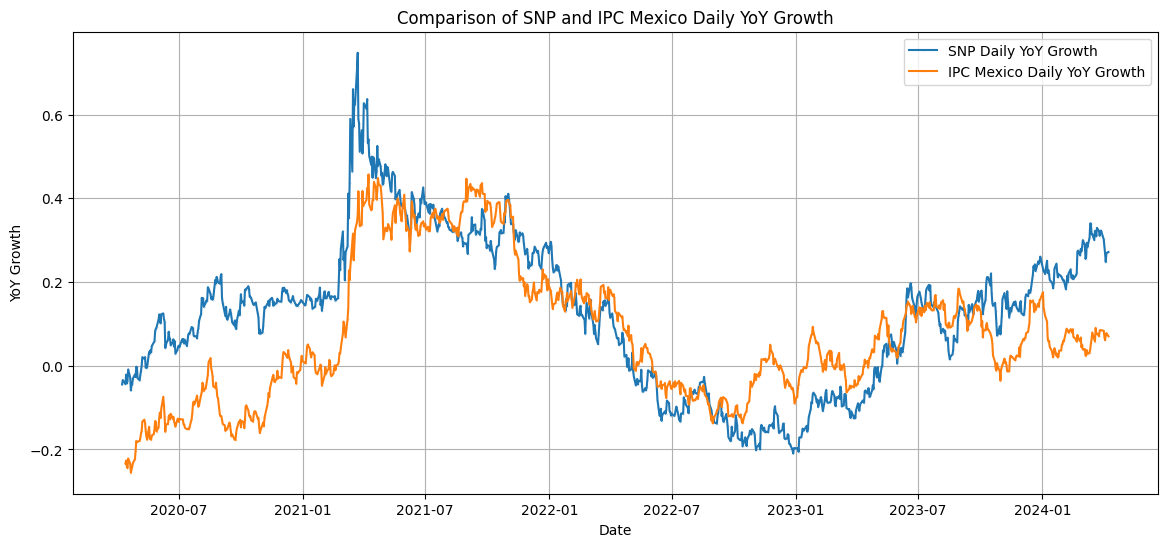

In [44]:

import pandas as pd
import matplotlib.pyplot as plt

# Plot the YoY growth

plt.figure(figsize=(14, 6))
plt.plot(SNP_daily['yoy_growth'], label='SNP Daily YoY Growth', marker='o', ms=.1)
plt.plot(IPC_Mexico_daily['yoy_growth'], label='IPC Mexico Daily YoY Growth', marker='s', ms=0.1)
plt.xlabel('Date')
plt.ylabel('YoY Growth')
plt.title('Comparison of SNP and IPC Mexico Daily YoY Growth')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
SNP_daily['yoy_growth'].tail(1) , IPC_Mexico_daily['yoy_growth'].tail(1)



(Date
 2024-04-08    0.27186
 Name: yoy_growth, dtype: float64,
 Date
 2024-04-08    0.070399
 Name: yoy_growth, dtype: float64)

Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected

Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023

Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value. Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)

In [90]:

top6 = ['2222.SR','BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

# Define start and end dates
start = '2022-01-01'
end = '2022-12-31'

# Create a dictionary to store dataframes for each ticker
ticker_dataframes = {}

# Calculate the maximum-minimum "Adj.Close" price ratio and store it directly
max_min_ratios = {}

# Download daily data for each ticker and print the first few rows
for ticker in top6:
    ticker_dataframes[ticker] = yf.download(tickers=ticker, period='max', start=start, end=end, interval='1d')
    # print(f"Downloaded data for {ticker}:")
    # print(ticker_dataframes[ticker].tail(2))

    df = ticker_dataframes[ticker]
    # Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value.
    max_close = df['Adj Close'].max()
    min_close = df['Adj Close'].min()
    max_min_ratio = (max_close - min_close) / max_close
    max_min_ratios[ticker] = max_min_ratio
    print(f"Max-Min Ratio for {ticker}: {max_min_ratio:.2f}")

    print("\n")




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Max-Min Ratio for 2222.SR: 0.27


Max-Min Ratio for BRK-B: 0.27


Max-Min Ratio for AAPL: 0.30


Max-Min Ratio for MSFT: 0.36


Max-Min Ratio for GOOG: 0.44


Max-Min Ratio for JPM: 0.38


